In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [45]:
housingDf = pd.read_csv('data/Housing.csv')
housingDf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [46]:
housingDf.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [47]:
housingDf.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [48]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [49]:
#Get string columns except furnishingstatus
columnsToConvert = housingDf.select_dtypes(include='object').columns.to_list()
columnsToConvert.remove('furnishingstatus')
columnsToConvert

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [50]:
#Converting Yes/No columns to 1/0 column for easier ML predictions
for col in columnsToConvert:
    housingDf[col] = housingDf[col].map({'yes': 1, 'no':0})

In [51]:
housingDf = pd.get_dummies(housingDf, columns=['furnishingstatus'], dtype='int64')
housingDf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


<Axes: >

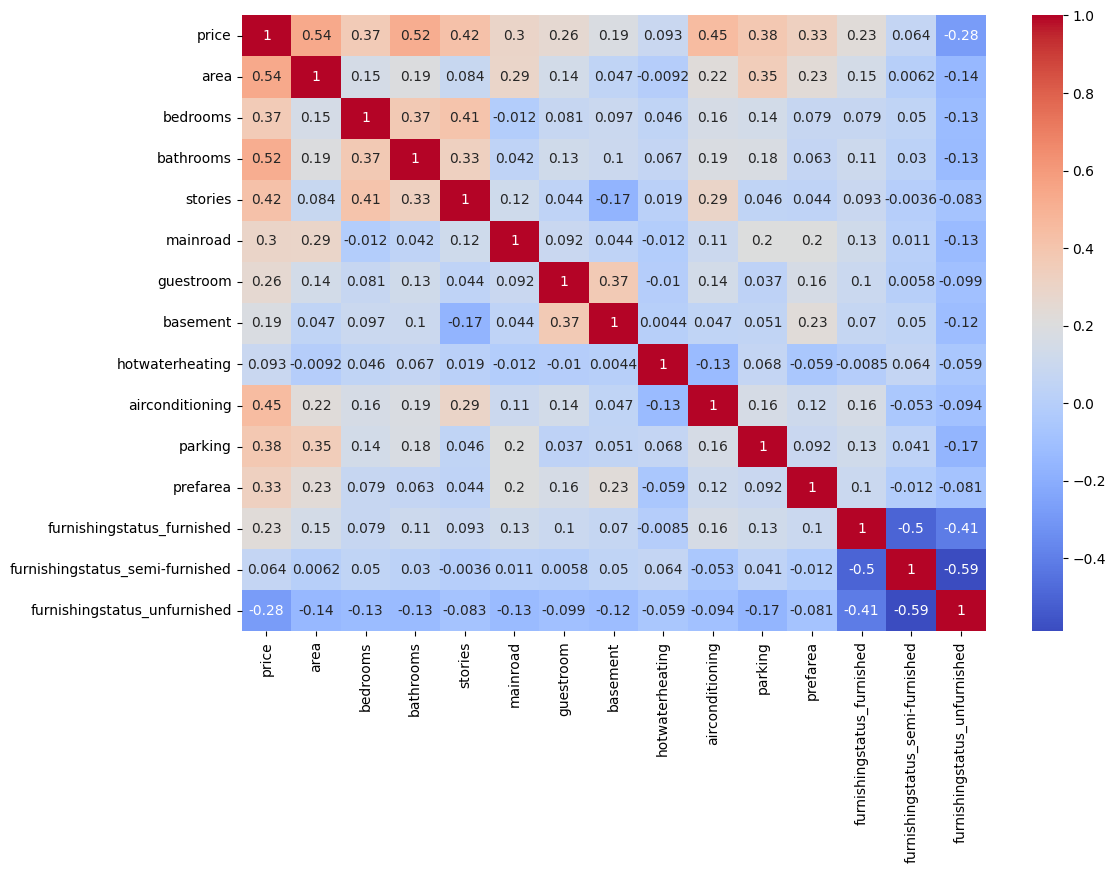

In [ ]:
corr = housingDf.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [78]:
corrCols = corr[( (corr['price'] > 0.1) | (corr['price'] <= -0.1) )][['price']].transpose().columns.to_list()
housingDf = housingDf[corrCols]

In [80]:
housingDf.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,2,1,0,0
3,12215000,7500,4,2,2,1,0,1,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,1,2,0,1,0
5,10850000,7500,3,3,1,1,0,1,1,2,1,0,0
6,10150000,8580,4,3,4,1,0,0,1,2,1,0,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,1,2,1,1,0
9,9800000,5750,3,2,4,1,1,0,1,1,1,0,1


## ML START

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [84]:
#Set equal scales for the dataframe
scaler = StandardScaler()

features = housingDf.drop(columns=['price'])
target = housingDf[['price']]

scaledFeatures = scaler.fit_transform(features)

In [91]:
#Split the features into split and train
x_train, x_test, y_train, y_test = train_test_split(scaledFeatures, target, train_size=0.9, random_state=42)

In [92]:
#Declare and train our model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [93]:
#Creating function to print model results
def model_metrics(y_test, y_hat):
    print(f'Max Error: {max_error(y_test, y_hat)}')
    print(f'MAE: {mean_absolute_error(y_test, y_hat)}')
    print(f'r^2 score: {r2_score(y_test, y_hat)}')

In [94]:
#Making predictions based on test data and showing model metrics
y_hat = model.predict(x_test)
model_metrics(y_test, y_hat)

Max Error: 4663714.481837736
MAE: 894597.4142957693
r^2 score: 0.6823379076253793
